# start_pakistan_correlations
## DRFL_computeCorrelAnnualTotals.ipynb
This script computes correlation between the Pakistan DR and FL meteorologies, using the drought metrics for the districts in the monitored provinces, and the CHIRPS 95%ile daily precipitation in the entire Indus basin.

In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

C:\Users\alexa\AppData\Local\Temp\ipykernel_16572\1401840239.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
C:\Users\alexa\AppData\Local\Temp\ipykernel_16572\1401840239.py:10: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import spearmanr


In [2]:
# Set the root path
rootPath = Path('C:/Users/alexa/Documents/02_work/02_start/02_deliv/05_pk_correlation/')

## Get the FL data
Daily precipitation from CHIRPS, for the entire Indus basin.

In [3]:
precipPath = rootPath/'fl/data/chirps'
precipData = pd.read_csv(precipPath/('CHIRPSDailyIndus1981-2022.csv'))
precipData.index = [pd.to_datetime(item, format='%Y%m%d') for item in precipData.date]
precipData=precipData.drop('date',axis=1)
precipData

,mean,median,p95,total
1981-01-01,0.000000,0.000000,0.000000,0.000000
1981-01-02,2.616719,0.000036,13.866395,106679.561900
1981-01-03,3.128428,0.000000,15.615570,127541.143600
1981-01-04,4.383004,0.619525,16.365246,178688.234500
1981-01-05,0.728298,0.000000,5.691761,29691.594300
...,...,...,...,...
2022-12-27,0.000000,0.000000,0.000000,0.000000
2022-12-28,0.114238,0.000000,0.000000,4657.314649
2022-12-29,1.790827,0.000000,6.558889,73009.247610
2022-12-30,0.000592,0.000000,0.000000,24.134931


### Aggregate the precip data
Take the max total Indus basin precip per year

In [35]:
precipData['year']=precipData.index.year
precipData['month']=precipData.index.month

In [36]:
## Filter by month first?

In [37]:
precipAgg = pd.DataFrame(precipData.groupby(by='year').sum()['total'])

In [38]:
precipAgg

,total
year,
1981,1.865853e+07
1982,1.694632e+07
1983,1.817349e+07
1984,1.885935e+07
1985,1.498166e+07
1986,1.672847e+07
1987,1.461592e+07
1988,1.939232e+07
1989,1.536148e+07


## Get the DR data
Drought metric per district, annual value

In [8]:
drPath = rootPath/'dr/data/prep'
drFiles = [item.stem+item.suffix for item in list(drPath.iterdir())]

In [9]:
drFiles

['precipThreshold.csv',
 'ProvinceThreshold.csv',
 'vhiThreshold.csv',
 'yieldThreshold.csv',
 'yieldThresholdDetrended.csv']

In [109]:
balochistan=pd.read_csv(drPath/'precipThreshold.csv', index_col=0).drop('pctile',axis=1)
punjab=pd.read_csv(drPath/'yieldThresholdDetrended.csv', index_col=0).drop('pctile',axis=1)
sindh=pd.read_csv(drPath/'vhiThreshold.csv', index_col=0).drop('pctile',axis=1)

### Aggregate drought districts
For Balochistan (precip) and Punjab (yield), compute the sum across all districts. For Sindh (VHI), compute the mean across the districts. This is a simplistic approach (since districts get an equal weighting, but in fact may have different area and / or population sizes).

In [110]:
balochistanAgg = pd.DataFrame(balochistan.sum(axis=0))
punjabAgg = pd.DataFrame(punjab.mean(axis=0))
sindhAgg = pd.DataFrame(sindh.mean(axis=0))

In [111]:
punjabAgg.index=[int(item.split('.')[0]) for item in punjabAgg.index]#.astype(int)

In [76]:
punjabAgg

,0
1983,0.089708
1984,-0.190411
1985,-0.079298
1986,0.208036
1987,-0.229877
1988,-0.101154
1989,0.042729
1990,-0.011875
1991,-0.036236
1992,0.082554


In [95]:
# # Make Balochistan and VHI inverse since positive values mean no drought, but we want positive to be more drought
# balochistanAgg=balochistanAgg*-1
# sindhAgg=sindhAgg*-1

In [83]:
sindhAgg

,0
2002,-30.724409
2003,-37.510864
2004,-55.151591
2005,-61.363773
2006,-41.813500
2007,-61.343409
2008,-51.920136
2009,-50.902545
2010,-44.717682
2011,-61.862409


## Plot the annual time series

In [96]:
plotData=[precipAgg,balochistanAgg,punjabAgg,sindhAgg]
plotNames = ['Total precipitation in the Indus Basin',
             'Balochistan (Sum of district precipitation)',
              'Punjab (Mean of district yield)',
              'Sindh (Mean of district VHI)']

In [85]:
colors=[
(68/255,84/255,106/255),    
(254/255,106/255,70/255), 
(133/255,239/255,205/255),
(255/255,192/255,0/255),    
(165/255,165/255,165/255), 
(255/255,193/255,179/255), 
(184/255,193/255,218/255),    
(24/255,186/255,134/255)
]

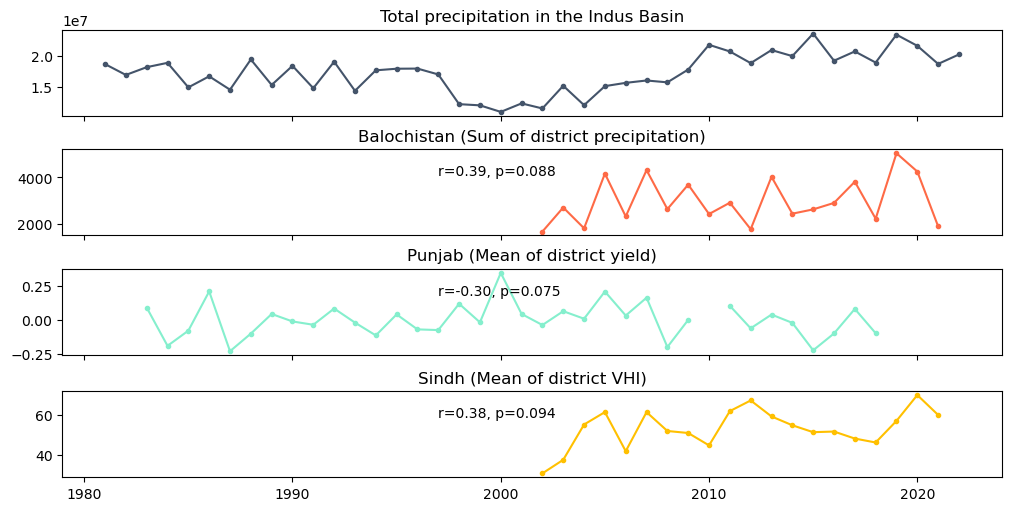

In [103]:
fig, axes = plt.subplots(4, 1, figsize=(10,5), sharex=True, constrained_layout=True)

for i, ax in enumerate(axes):
    
    ax.set_title(plotNames[i])
    data=plotData[i]
    data.index=data.index.astype(int)
    ax.plot(data, color=colors[i], marker='o', markersize=3)
    
    # For each, compute the correlation with the total precip
    mergeData = precipAgg.merge(data, left_index=True, right_index=True)
    mergeData = mergeData.dropna()
    correlResult = list(pearsonr(mergeData.iloc[:,0], mergeData.iloc[:,1]))
    
    # Annotate to the plot
    textStr = 'r={0:.2f}, p={1:.3f}'.format(correlResult[0], correlResult[1])
    if i!=0:
        ax.text(0.4, 0.7, textStr, transform=ax.transAxes)
    
    
plt.show()    

## Use the not detrended data for yield in Punjab

In [112]:
punjabNotDetrended=pd.read_csv(drPath/'yieldThreshold.csv', index_col=0).drop('pctile',axis=1)

In [113]:
punjabNDAgg = pd.DataFrame(punjabNotDetrended.mean(axis=0))
punjabNDAgg.index=[int(item.split('.')[0]) for item in punjabAgg.index]#.astype(int)

AttributeError: 'int' object has no attribute 'split'

In [115]:
plotData=[precipAgg,balochistanAgg,punjabAgg,punjabNDAgg,sindhAgg]
plotNames = ['Total precipitation in the Indus Basin',
             'Balochistan (Sum of district precipitation)',
              'Punjab (Mean of district yield) Detrended',
             'Punjab (Mean of district yield)',
              'Sindh (Mean of district VHI)']

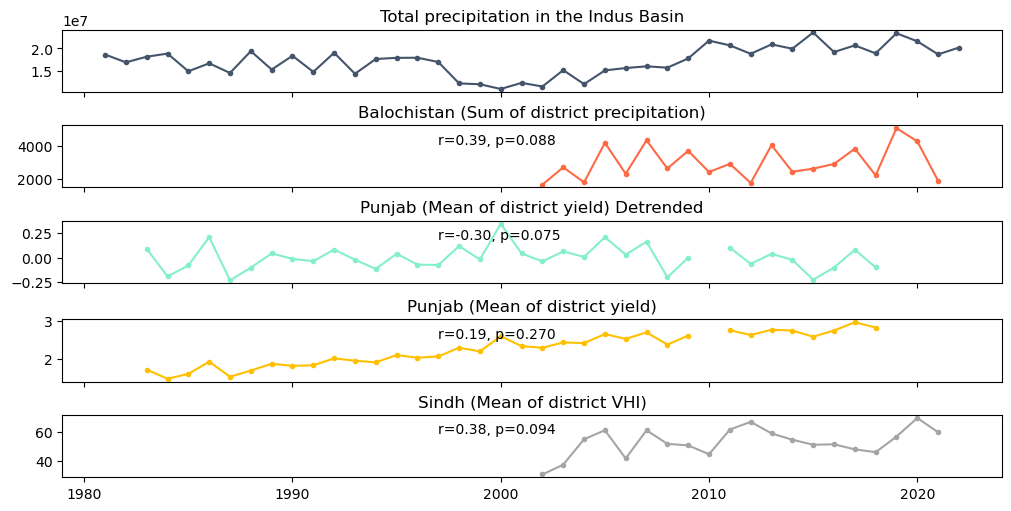

In [117]:
fig, axes = plt.subplots(5, 1, figsize=(10,5), sharex=True, constrained_layout=True)

for i, ax in enumerate(axes):
    
    ax.set_title(plotNames[i])
    data=plotData[i]
    data.index=data.index.astype(int)
    ax.plot(data, color=colors[i], marker='o', markersize=3)
    
    # For each, compute the correlation with the total precip
    mergeData = precipAgg.merge(data, left_index=True, right_index=True)
    mergeData = mergeData.dropna()
    correlResult = list(pearsonr(mergeData.iloc[:,0], mergeData.iloc[:,1]))
    
    # Annotate to the plot
    textStr = 'r={0:.2f}, p={1:.3f}'.format(correlResult[0], correlResult[1])
    if i!=0:
        ax.text(0.4, 0.7, textStr, transform=ax.transAxes)
    
    
plt.show()    